In [33]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df=pd.read_pickle("Data.RQ2")

In [35]:
df_categories = df[df.Category.notnull()]
views = df_categories[df_categories.event_type == 'view']
purchases = df_categories[df_categories.event_type == 'purchase']

In [36]:
d1 = purchases.groupby('Category').event_type.count().reset_index().rename(columns =
                                                    {'event_type':'purchases_number'})

In [37]:
d2 = views.groupby('SubCategory').event_type.count().reset_index().rename(columns =
                                                    {'event_type':'views'})


In [38]:
d1
#DA PLOTTARE MESE PER MESE(VERRANO 7 GRAFICI)

,Category,purchases_number
0,accessories,36854
1,apparel,455370
2,appliances,925763
3,auto,54205
4,computers,202396
5,construction,2442248
6,country_yard,10849
7,electronics,1341139
8,furniture,197485
9,kids,93757


In [39]:
d2

,SubCategory,views
0,accessories.bag,3431550
1,accessories.umbrella,267964
2,accessories.wallet,1106654
3,apparel.belt,17577
4,apparel.costume,2380528
...,...,...
61,sport.snowboard,376484
62,sport.tennis,242265
63,sport.trainer,3792206
64,stationery.cartrige,172248


In [55]:
purchases["Category"]=purchases["Category"].astype("string")

In [41]:
res=purchases.groupby(["Category","product_id"])["event_type"].count().to_frame().rename(columns =
                                                    {'event_type':'purchases'})


In [42]:
temp=res.sort_values('purchases', ascending= False).sort_index(level='Category', sort_remaining=False)

In [43]:
temp

purchases
Category    product_id           
accessories 4700478          1669
            4700630          1127
            4700419           508
            16000973          484
            16000974          465
...                           ...
stationery  25510214            1
            12901522            1
            12901523            1
            12901527            1
            12901548            1

[134685 rows x 1 columns]

In [44]:
categories=list(set(temp.index.get_level_values(0)))

In [45]:
for element in categories:
    
    a=temp.xs(element,level="Category")
    
    lenght=min(10,len(a))
    
    print (element, a[:lenght])
    
    
#DA CAMBIARE FORMATO OUTPUT, provare con grafici

auto             purchases
product_id           
6000094          1885
27900034         1104
4700478           894
6000227           849
27900026          791
5701128           689
27900038          618
5701166           578
27900037          572
22400036          530
construction             purchases
product_id           
1004767        133385
1005100        131434
1005115        123515
1005212         90971
1002544         87401
1004856         78401
1005160         62774
100068488       54197
1005105         49919
1004249         43342
country_yard             purchases
product_id           
40500104          991
21700002          727
40500183          455
21700003          355
21700001          231
40500103          220
40500173          208
21700004          191
26800031          178
100092465         162
appliances             purchases
product_id           
1801690         14985
3700926         13892
1005174         11965
1801766         10907
3600661          9697
1801881     

In [94]:
%reset -f

In [95]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_pickle("Data.RQ3")

In [96]:
df_categories = df[df.Category.notnull()]

purchases = df_categories[df_categories.event_type == 'purchase']

purchases= purchases[purchases.brand.notnull()]



In [97]:
purchases

,event_type,Category,brand,price
162,purchase,electronics,samsung,130.76
308,purchase,electronics,apple,642.69
442,purchase,furniture,santeri,54.42
574,purchase,electronics,apple,189.91
603,purchase,electronics,apple,161.98
...,...,...,...,...
66588075,purchase,apparel,glo,18.02
66588131,purchase,construction,apple,952.15
66588797,purchase,construction,apple,807.20
66589042,purchase,sport,jbl,10.53


In [98]:
purchases["Category"]=purchases["Category"].astype("string")
purchases["brand"]=purchases["brand"].astype("string")

In [99]:
purchases.groupby(["Category","brand"]).price.mean().sort_values(ascending= False).sort_index(level='Category', sort_remaining=False)
categories=purchases.Category.unique()

In [100]:
print (*list(categories))

electronics furniture appliances auto computers apparel construction accessories stationery kids medicine sport country_yard


In [117]:
avg_category=purchases.groupby(["Category","brand"]).price.mean().sort_values(ascending= False).sort_index(level='Category', sort_remaining=False)

In [118]:
avg_category=pd.DataFrame(avg_category)

In [119]:
avg_category

price
Category    brand                     
accessories fitlux          930.953333
            dji             797.151429
            fly             661.510000
            askona          635.904500
            brw             599.343000
...                                ...
stationery  catrice           6.180000
            barer             5.877143
            zewa              4.040000
            originalam.net    2.570000
            selpak            1.340000

[8373 rows x 1 columns]

In [120]:
categories=list(categories)
results=[]
for element in categories:
    temp=avg_category.xs(element,level="Category")
    results.append((element,temp.head(1).index[0],round(float(temp.head(1).values[0]),2)))

In [121]:
results.sort(key=lambda x:x[1])

In [122]:
df = pd.DataFrame(results, columns =['Category', 'brand', 'highest_price']) 

In [123]:
df

,Category,brand,highest_price
0,computers,cime,2536.60
1,stationery,dewalt,931.94
2,electronics,dreammachines,2362.71
3,auto,femi,2290.92
4,accessories,fitlux,930.95
5,apparel,gomeldrev,2445.37
6,furniture,gravas,2496.85
7,medicine,grownup,115.83
8,kids,hartan,1801.82
9,country_yard,hygge,859.74


In [124]:
def plot(category):
    assert category in categories,"Non-existing category"
    temp=avg_category.xs(category,level="Category").reset_index()
    y_lenght=math.ceil(len(temp)/5)
    fig = plt.figure(figsize=(15,y_lenght))
   
    plot = sns.barplot(y="brand", x='price', data=temp)
    plot.set(xlabel="average price", ylabel=category)

#Ho messo il grafico con avg price sull'asse x in modo da non fare casini quando si chiama la funzione su una categoria grande,
#provate con electronics volendo. La y_lenght è variabile

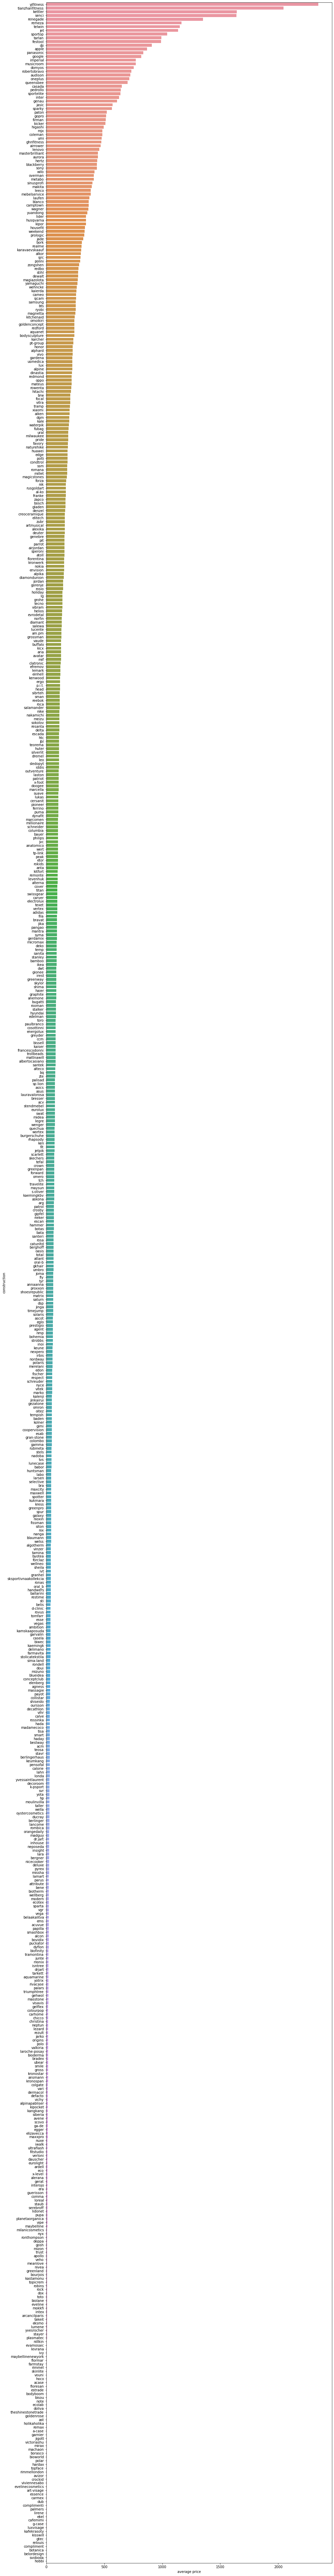

In [125]:
plot("construction")